  EDUNET FINAL PROJECT SUBMISSION - (WATER QUALITY PREDICTION)

In [103]:
import pandas as pd
import numpy as np
import seaborn as sc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [104]:
df = pd.read_csv('/content/sample.csv',sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [105]:
df['date'] = pd.to_datetime(df['date'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [107]:
df.isnull().sum().sum()

np.int64(153)

In [108]:
df.dropna(inplace=True)

In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
df.drop_duplicates(inplace=True)

In [111]:
df.size

30536

In [112]:
resultant_data = df[['date','O2']]

In [113]:
resultant_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2776 non-null   datetime64[ns]
 1   O2      2776 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 65.1 KB


In [114]:
x = df.drop(columns=['O2', 'date'])

In [115]:
x

,id,NH4,BSK5,Suspended,NO3,NO2,SO4,PO4,CL
0,1,0.330,2.77,12.0,9.50,0.057,154.00,0.454,289.50
1,1,0.044,3.00,51.6,17.75,0.034,352.00,0.090,1792.00
2,1,0.032,2.10,24.5,13.80,0.173,416.00,0.200,2509.00
3,1,0.170,2.23,35.6,17.13,0.099,275.20,0.377,1264.00
4,1,0.000,3.03,48.8,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...
2856,22,0.046,2.69,3.6,3.80,0.038,160.00,0.726,77.85
2857,22,0.000,1.52,0.5,0.56,0.031,147.20,0.634,71.95
2858,22,0.034,0.29,0.8,2.58,0.042,209.92,0.484,61.17
2859,22,0.000,2.10,0.0,3.94,0.034,121.60,0.424,63.49


In [116]:
y = df['O2']

In [117]:
y

,O2
0,12.30
1,14.61
2,9.87
3,12.40
4,14.69
...,...
2856,8.28
2857,11.26
2858,11.09
2859,14.31


In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [119]:
print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

19980
5004
2220
556


In [120]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scalar = sc.fit_transform(x_train)
x_test_scalar = sc.transform(x_test)

In [121]:
model = RandomForestRegressor(random_state=42)

In [122]:
param_grid = {
    'max_depth': [2, 4, 5],
    'min_samples_split': [12, 23, 34],
    'min_samples_leaf': [10, 20, 30]
}

In [123]:
grid_search_csv = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=5, scoring='r2', n_jobs=-1)

In [124]:
grid_search_csv.fit(x_train_scalar, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [12, 23, 34]},
             scoring='r2')

In [125]:
print("Best parameters:", grid_search_csv.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 12}


In [126]:
model = RandomForestRegressor(max_depth=5,min_samples_leaf=30,min_samples_split=12)

In [129]:
model.fit(x_train_scalar,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=30, min_samples_split=12)

In [130]:
y_pred = model.predict(x_test_scalar)


In [131]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.25727138762558066
Mean Squared Error: 10.955017014563012


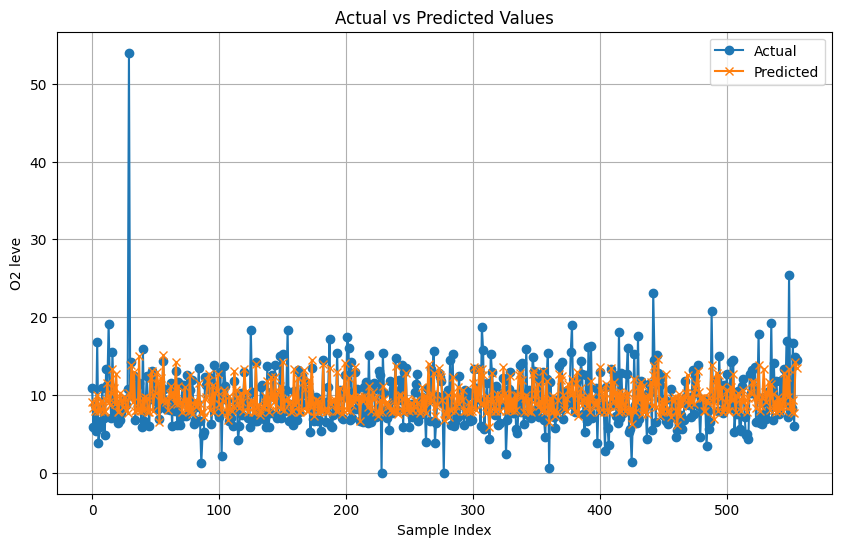

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('O2 leve')
plt.legend()
plt.grid(True)
plt.show()
